# Implement Neural Network (or Logistic Regression) From Scratch


### Predicting if a person would buy life insurnace based on his age using logistic regression

Above is a binary logistic regression problem as there are only two possible outcomes (i.e. if person buys insurance or he/she doesn't).

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import pandas as pd

1. First Implementing NN model using Tensorflow.

In [2]:
df = pd.read_csv("D:\Desktop\Work\DL\insurance_data.csv")
df.head()

,age,affordibility,bought_insurance
0,22,1,0
1,25,0,0
2,47,1,1
3,52,0,0
4,46,1,1


Split train and test set

In [3]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df.drop("bought_insurance", axis=1), df["bought_insurance"], test_size=0.2, random_state=42)

Preprocessing: Scale the data so that both age and affordibility are in same scaling range

In [5]:
X_train_scaled = X_train.copy()
X_train_scaled["age"] = X_train_scaled["age"]/100

X_test_scaled = X_test.copy()
X_test_scaled["age"] = X_test_scaled["age"]/100

Model Building: First build a model in keras/tensorflow and see what weights and bias values it comes up with. We will than try to reproduce same weights and bias in our plain python implementation of gradient descent. Below is the architecture of our simple neural network

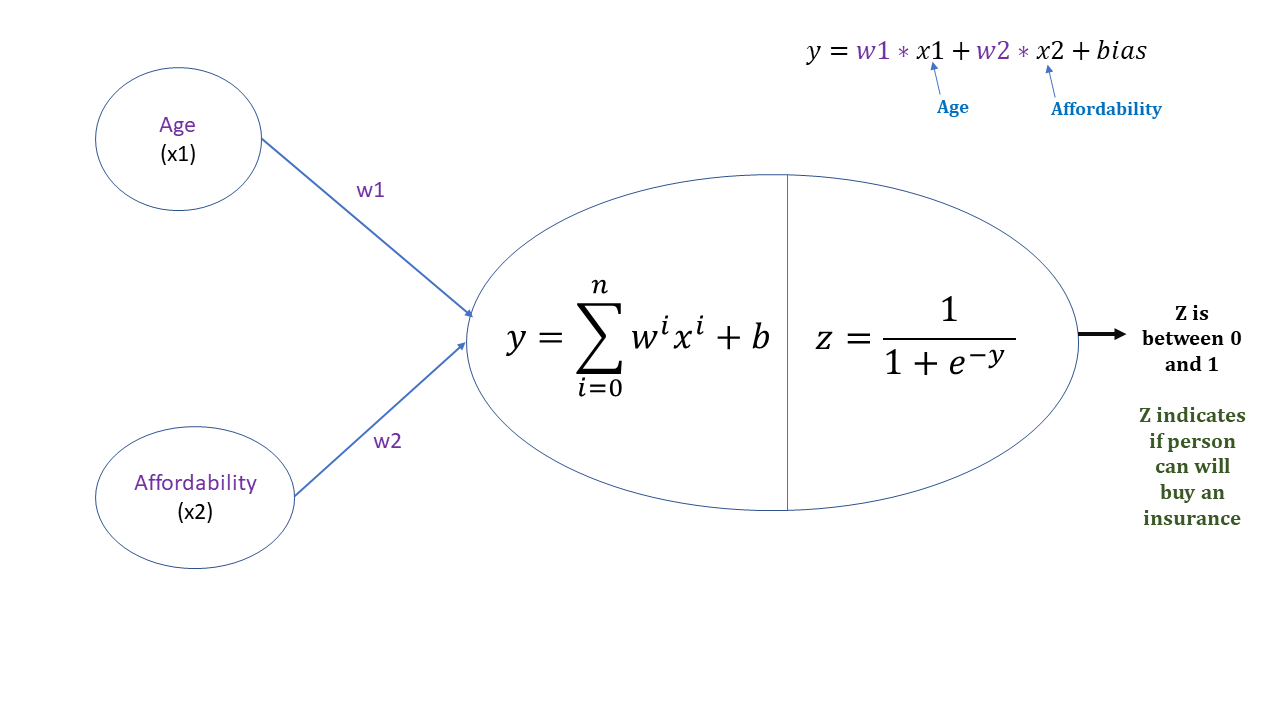

In [7]:
model = keras.Sequential([
    keras.layers.Dense(1, input_shape=(2,), activation='sigmoid', kernel_initializer='ones', bias_initializer='zeros')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy']) # Binary crossentropy for binary classification is same as log loss 
model.fit(X_train_scaled, y_train, epochs=5000)

Epoch 1/5000


c:\Users\DELL\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 471ms/step - accuracy: 0.5000 - loss: 0.7428
Epoch 2/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - accuracy: 0.5000 - loss: 0.7424
Epoch 3/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - accuracy: 0.5000 - loss: 0.7420
Epoch 4/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - accuracy: 0.5000 - loss: 0.7416
Epoch 5/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step - accuracy: 0.5000 - loss: 0.7411
Epoch 6/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step - accuracy: 0.5000 - loss: 0.7407
Epoch 7/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - accuracy: 0.5000 - loss: 0.7403
Epoch 8/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step - accuracy: 0.5000 - loss: 0.7399
Epoch 9/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step - accuracy: 0.5000 - loss: 0.7395
Epoch 10/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step - accuracy: 0.5000 - loss: 0.7390
Epoch 11/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step - accuracy: 0.5000 - loss: 0.7386
Epoch 12/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step - accuracy: 0.5000 - l

Evaluate the model on test set

In [8]:
model.evaluate(X_test_scaled,y_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 427ms/step - accuracy: 1.0000 - loss: 0.2647


[0.26470300555229187, 1.0]

In [9]:
model.predict(X_test_scaled)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 149ms/step


array([[0.81626713],
       [0.7576754 ],
       [0.8236742 ],
       [0.18819511],
       [0.38559136],
       [0.1959822 ]], dtype=float32)

In [10]:
y_test

9     1
25    1
8     1
21    0
0     0
12    0
Name: bought_insurance, dtype: int64

Now get the value of weights and bias from the model

In [11]:
coef, intercept = model.get_weights()
coef, intercept

(array([[5.0183096],
        [1.1966311]], dtype=float32),
 array([-2.7665412], dtype=float32))

This means w1=5.0183096, w2=1.1966311, bias =-2.7665412

2. Now creating NN from scratch using maths

Now we start implementing gradient descent in plain python. Again the goal is to come up with same w1, w2 and bias that keras model calculated. We want to show how keras/tensorflow would have computed these values internally using gradient descent

First write couple of helper routines such as sigmoid and log_loss

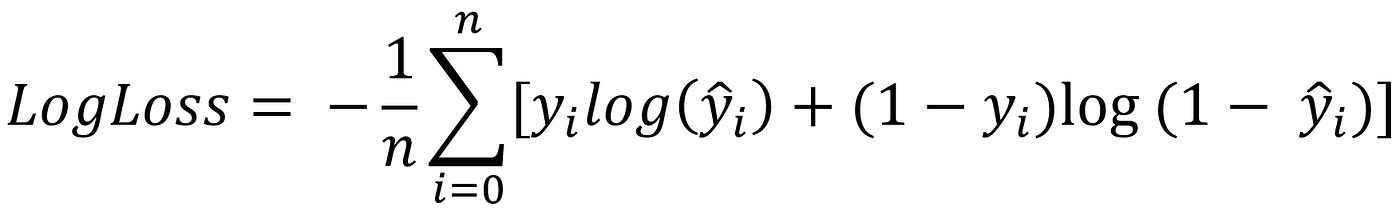

In [12]:
def sigmoid_numpy(X):
   return 1/(1+np.exp(-X))

def log_loss(y_true, y_predicted):
    epsilon = 1e-15
    y_predicted_new = [max(i,epsilon) for i in y_predicted]
    y_predicted_new = [min(i,1-epsilon) for i in y_predicted_new]
    y_predicted_new = np.array(y_predicted_new)
    return -np.mean(y_true*np.log(y_predicted_new)+(1-y_true)*np.log(1-y_predicted_new))

All right now comes the time to implement our own custom neural network class.

In [14]:
class myNN:
    def __init__(self):
        self.w1 = 1 
        self.w2 = 1
        self.bias = 0
        
    def fit(self, X, y, epochs, loss_thresold):
        self.w1, self.w2, self.bias = self.gradient_descent(X['age'],X['affordibility'],y, epochs, loss_thresold)
        print(f"Final weights and bias: w1: {self.w1}, w2: {self.w2}, bias: {self.bias}")
        
    def predict(self, X_test):
        weighted_sum = self.w1*X_test['age'] + self.w2*X_test['affordibility'] + self.bias
        return sigmoid_numpy(weighted_sum)

    def gradient_descent(self, age,affordability, y_true, epochs, loss_thresold):
        w1 = w2 = 1
        bias = 0
        rate = 0.5
        n = len(age)
        for i in range(epochs):
            weighted_sum = w1 * age + w2 * affordability + bias
            y_predicted = sigmoid_numpy(weighted_sum)
            loss = log_loss(y_true, y_predicted)
            
            w1d = (1/n)*np.dot(np.transpose(age),(y_predicted-y_true)) 
            w2d = (1/n)*np.dot(np.transpose(affordability),(y_predicted-y_true)) 

            bias_d = np.mean(y_predicted-y_true)
            w1 = w1 - rate * w1d
            w2 = w2 - rate * w2d
            bias = bias - rate * bias_d
            
            if i%50==0:
                print (f'Epoch:{i}, w1:{w1}, w2:{w2}, bias:{bias}, loss:{loss}')
            
            if loss<=loss_thresold:
                print (f'Epoch:{i}, w1:{w1}, w2:{w2}, bias:{bias}, loss:{loss}')
                break

        return w1, w2, bias

In [21]:
customModel = myNN()
customModel.fit(X_train_scaled, y_train, epochs=5000, loss_thresold=0.4923)

Epoch:0, w1:0.9736899318847281, w2:0.931388810977659, bias:-0.11748951666770448, loss:0.7428288579142563
Epoch:50, w1:1.5242798722391318, w2:0.8822187836689879, bias:-1.1310088596841466, loss:0.5943161377198863
Epoch:100, w1:2.228187036337397, w2:1.0212075704807773, bias:-1.5219348336892933, loss:0.5674253359204207
Epoch:150, w1:2.8788802020633857, w2:1.0918966282424585, bias:-1.8376731064036331, loss:0.5462065237139113
Epoch:200, w1:3.473286412049912, w2:1.1354958313845407, bias:-2.109494376761035, loss:0.5289749850551891
Epoch:250, w1:4.014235251285109, w2:1.168307211546194, bias:-2.3515205001257873, loss:0.5148317335261617
Epoch:300, w1:4.506491403088423, w2:1.1967920767703706, bias:-2.570834600613761, loss:0.5031414005690805
Epoch:350, w1:4.955154772161112, w2:1.2234470550440064, bias:-2.7714756232427904, loss:0.4934177492028928
Epoch:357, w1:5.01476871080517, w2:1.2270942127849047, bias:-2.7982358620493586, loss:0.49219068663420595
Final weights and bias: w1: 5.01476871080517, w2:

In [22]:
coef, intercept = model.get_weights()
coef, intercept

(array([[5.0183096],
        [1.1966311]], dtype=float32),
 array([-2.7665412], dtype=float32))

Using our customModel we got Final weights and bias: w1: 5.01476871080517, w2: 1.2270942127849047, bias: -2.7982358620493586 while using TensorFlow model we got w1=5.0183096, w2=1.1966311, bias =-2.7665412, which is almost similar.

(2) Predict using custom model

In [23]:
customModel.predict(X_test_scaled)

9     0.815758
25    0.757098
8     0.823176
21    0.183263
0     0.385115
12    0.190888
dtype: float64

In NN, belowe 0.5 consider as 0 and above 0.5 consider as 1.


(1) Predict using tensorflow model

In [24]:
model.predict(X_test_scaled)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


array([[0.81626713],
       [0.7576754 ],
       [0.8236742 ],
       [0.18819511],
       [0.38559136],
       [0.1959822 ]], dtype=float32)

In [25]:
y_test

9     1
25    1
8     1
21    0
0     0
12    0
Name: bought_insurance, dtype: int64

Above We can compare predictions from our own custom model and tensoflow model. We will notice that predictions are almost same